In [1]:
import numpy as np
from IPython.display import Image

In [2]:
import seaborn as sns

In [3]:
def get_houses():

    houses = np.zeros((10,10))
    houses[0,2] = 1
    houses[0,4] = 1
    houses[0,5] = 1
    houses[0,7] = 1

    houses[1,0] = 1
    houses[1,4] = 1

    houses[2,3] = 1
    houses[2,5] = 1
    houses[2,6] = 1
    houses[2,8] = 1
    houses[2,9] = 1

    houses[3,4] = 1
    houses[3,6] = 1
    houses[3,8] = 1

    houses[4,2] = 1
    houses[4,5] = 1
    houses[4,6] = 1
    houses[4,7] = 1
    houses[4,8] = 1

    houses[5,0] = 1
    houses[5,3] = 1
    houses[5,4] = 1
    houses[5,6] = 1

    houses[6,0] = 1
    houses[6,1] = 1
    houses[6,2] = 1
    houses[6,3] = 1
    houses[6,4] = 1
    houses[6,9] = 1

    houses[7,4] = 1
    houses[7,6] = 1

    houses[8,0] = 1
    houses[8,2] = 1
    houses[8,6] = 1
    houses[8,7] = 1
    houses[8,9] = 1

    houses[9,0] = 1
    houses[9,4] = 1
    houses[9,5] = 1
    houses[9,8] = 1
    houses[9,9] = 1

    return houses.astype(np.int8)

In [4]:
houses = get_houses()

In [5]:
houses

array([[0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 1, 1]], dtype=int8)

In [6]:
def get_weight(i_possiblities,j_possiblities,houses):
    return np.sum(houses[i_possiblities[0]:i_possiblities[-1]+1,j_possiblities[0]:j_possiblities[-1]+1])

In [7]:
def get_weight_matrix(_houses):
    weight_matrix = np.zeros((10,10))
    for i in range(_houses.shape[0]):
        for j in range(_houses.shape[1]):
            if i>0 and i<10:
                i_possiblities = [i-1,i,i+1]
            elif i==0:
                i_possiblities = [i,i+1]
            else:
                i_possiblities = [i-1,i]
            if j>0 and j<10:
                j_possiblities = [j-1,j,j+1]

            elif j==0:
                j_possiblities = [j,j+1]
            else:
                j_possiblities = [j-1,j]
            weight_matrix[i,j] = get_weight(i_possiblities,j_possiblities,_houses)
    return weight_matrix

In [8]:
def add_tower(i,j,houses,towers):
    new_houses = houses.copy()
    if i>0 and i<10:
            i_possiblities = [i-1,i,i+1]
    elif i==0:
            i_possiblities = [i,i+1]
    else:
            i_possiblities = [i-1,i]
    if j>0 and j<10:
            j_possiblities = [j-1,j,j+1]
    elif j==0:
            j_possiblities = [j,j+1]
    else:
            j_possiblities = [j-1,j]
    new_houses[int(i_possiblities[0]):int(i_possiblities[-1])+1,int(j_possiblities[0]):int(j_possiblities[-1])+1] = 0
    towers[i,j] = 1
    return new_houses,towers

#### %70 Service Rate

In [22]:
houses = get_houses()

In [23]:
print(get_weight_matrix(houses))

[[1. 2. 1. 3. 3. 3. 2. 1. 1. 0.]
 [1. 2. 2. 4. 5. 5. 4. 3. 3. 2.]
 [1. 1. 1. 3. 4. 5. 3. 4. 3. 3.]
 [0. 1. 2. 3. 4. 6. 6. 7. 5. 4.]
 [1. 2. 2. 4. 4. 6. 5. 6. 3. 2.]
 [3. 5. 5. 6. 5. 5. 4. 4. 3. 2.]
 [3. 4. 4. 6. 5. 5. 2. 2. 1. 1.]
 [3. 5. 4. 5. 3. 4. 3. 3. 3. 2.]
 [2. 3. 1. 3. 3. 5. 4. 4. 4. 3.]
 [2. 3. 1. 2. 2. 3. 3. 3. 4. 3.]]


In [9]:
houses = get_houses()
num_towers = 0
new_houses = houses.copy()
towers = np.zeros((10,10))
while (new_houses.sum() > 12):
    weight_matrix = get_weight_matrix(new_houses)
    max_weight_idx = np.where(weight_matrix == (weight_matrix.max()))
    try:
        for i in range(len(max_weight_idx[0])):
            x_max = max_weight_idx[0][i]
            y_max = max_weight_idx[1][i]
            if(towers[x_max,y_max]) == 0:
                break
    except Exception as e:
        x_max = max_weight_idx[0][0]
        y_max = max_weight_idx[1][0]
        print(e)
    new_houses,towers = add_tower(x_max,y_max,new_houses,towers)
    num_towers +=1
print(num_towers)

6


In [10]:
print(new_houses)

[[0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [11]:
print(towers)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Full Map

<AxesSubplot:>

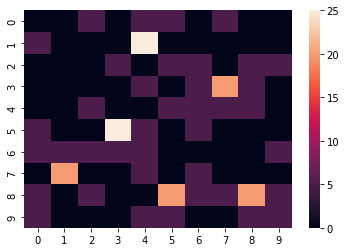

In [12]:
towers = towers*20
houses = get_houses()*5
sns.heatmap(towers+houses)

#### Houses Without Full Service

<AxesSubplot:>

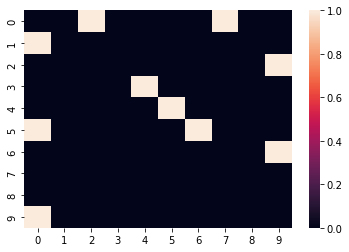

In [13]:
sns.heatmap(new_houses)

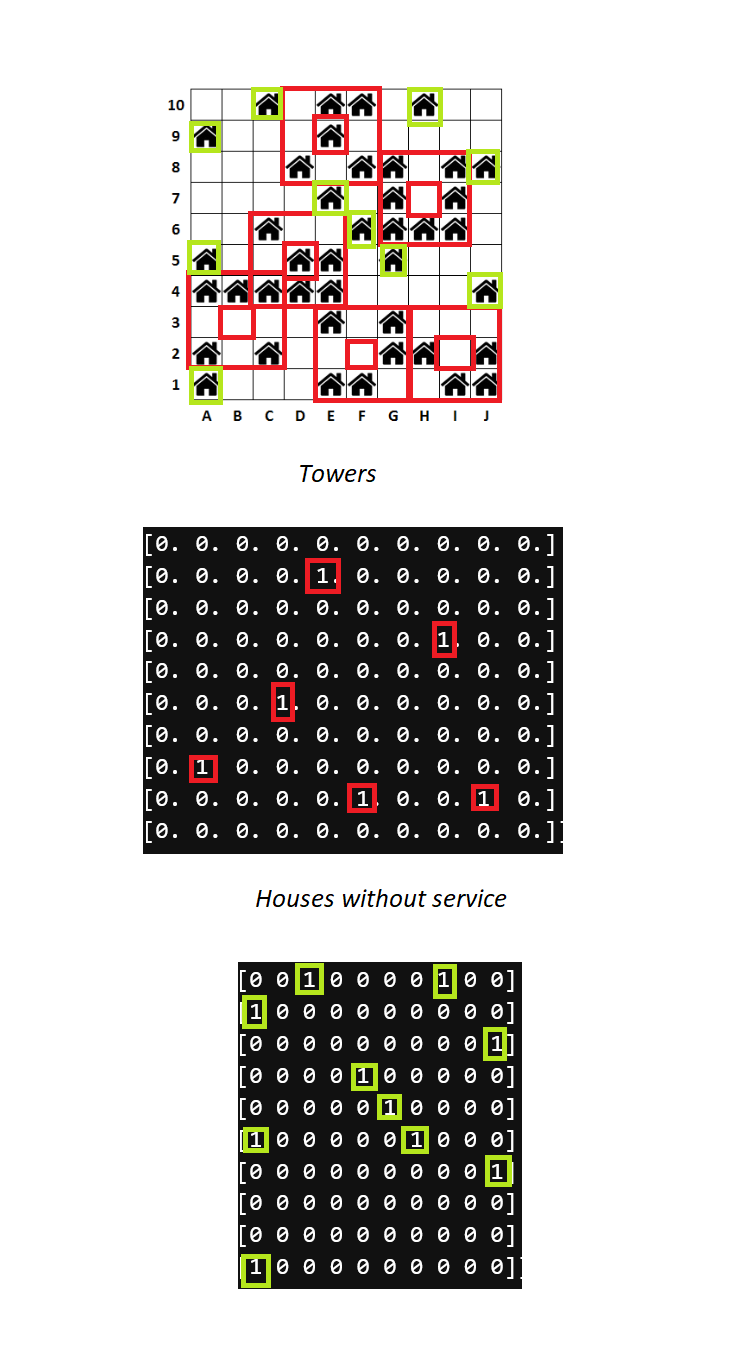

In [14]:
Image(filename='1st condition 70%.png')

#### %90 Service Rate

In [15]:
houses = get_houses()
num_towers = 0
new_houses = houses.copy()
towers = np.zeros((10,10))
while (new_houses.sum() > 4.1):
    weight_matrix = get_weight_matrix(new_houses)
    max_weight_idx = np.where(weight_matrix == (weight_matrix.max()))
    try:
        for i in range(len(max_weight_idx[0])):
            x_max = max_weight_idx[0][i]
            y_max = max_weight_idx[1][i]
            if(towers[x_max,y_max]) == 0:
                break
    except Exception as e:
        x_max = max_weight_idx[0][0]
        y_max = max_weight_idx[1][0]
        print(e)
    new_houses,towers = add_tower(x_max,y_max,new_houses,towers)
    num_towers +=1
print(num_towers)

9


In [16]:
print(new_houses)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [17]:
print(towers)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Full Map

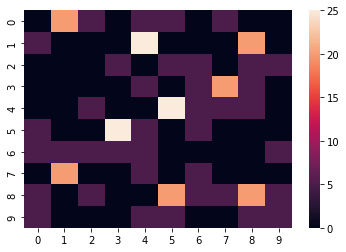

In [18]:
towers = towers*20
houses = get_houses()*5
fig = sns.heatmap(towers+houses)

#### Houses Without Service

<AxesSubplot:>

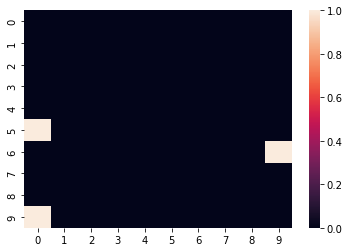

In [19]:
sns.heatmap(new_houses)

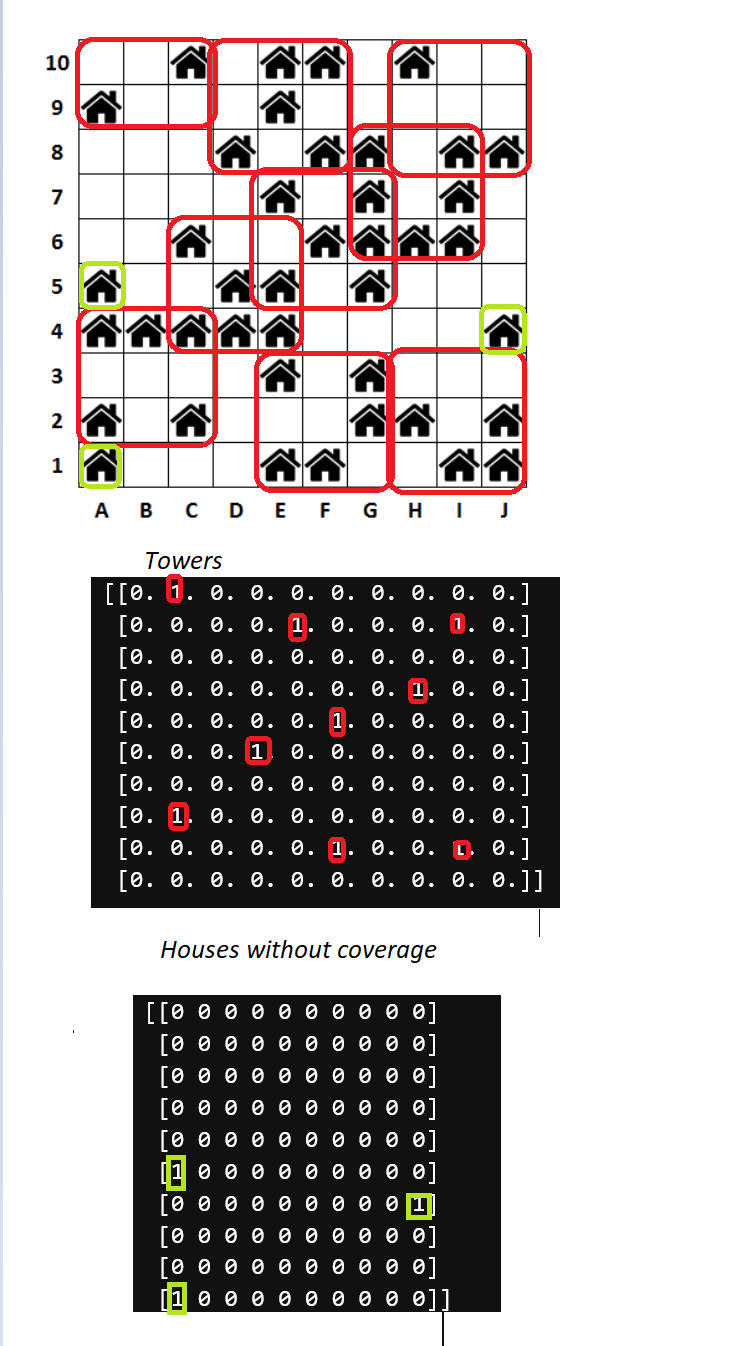

In [20]:
Image(filename='1st condition 90%.jpeg') 